### Funções de Auto-correlação e Auto-correlação parcial
Antes de investigarmos a autoregressão como ferramenta de modelagem, precisamos entender a relação de covariância e correlação existente nas amostras defasadas (deslocadas) de uma série temporal.


Vamos começar realizando os imports e o carregamento dos datasets utilizados nesta aula.

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf

# Dataset não estacionário
df1 = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Dataset estacionário
df2 = pd.read_csv('DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

O pacote Pandas tem uma função de plotagem integrada que plota valores crescentes de $y_t$ no eixo horizontal em relação a versões defasadas dos valores $y_{t+1}$ no eixo vertical. Se um conjunto de dados não for estacionário com uma tendência ascendente, então os valores vizinhos deverão ter a mesma tendência. Vejamos primeiro o conjunto de dados de passageiros aéreos.

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

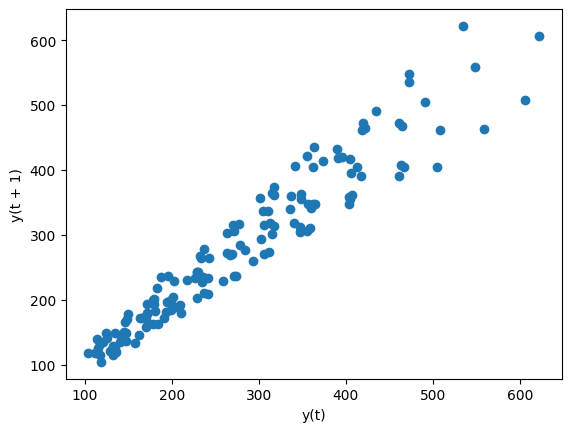

In [3]:
from pandas.plotting import lag_plot
lag_plot(df1['Thousands of Passengers'])

O gráfico mostra evidências de uma autocorrelação muito forte; à medida que os valores $y_t$ aumentam, os valores próximos (defasados) também aumentam.

Vamos agora plotar os dados do dataset estacionário <strong>Daily Total Female Births</strong>.

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

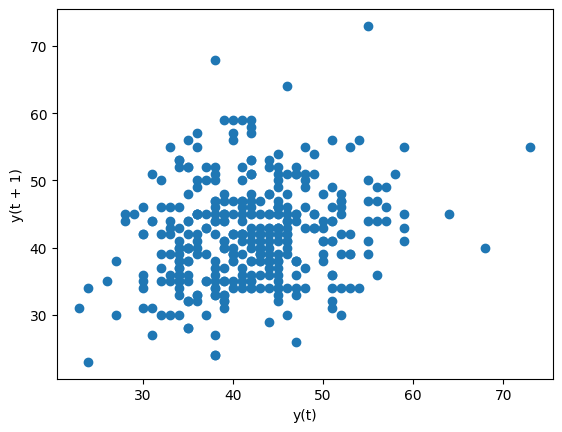

In [4]:
lag_plot(df2['Births'])

Conforme esperado, não vemos evidências de autocorrelação nos dados desse dataset.

### Plotagem da Autocorrelação (ACF - AutoCorrelation Function)
Traçar a magnitude das autocorrelações nas primeiras defasagens (20-40) pode fornecer insights importantes sobre uma série temporal.

Vamos analisar o gráfico de autocorrelação entre os dados do dataset <strong>Daily Total Female Births</strong> utilizando uma defasagem (lag) de 40.

In [6]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

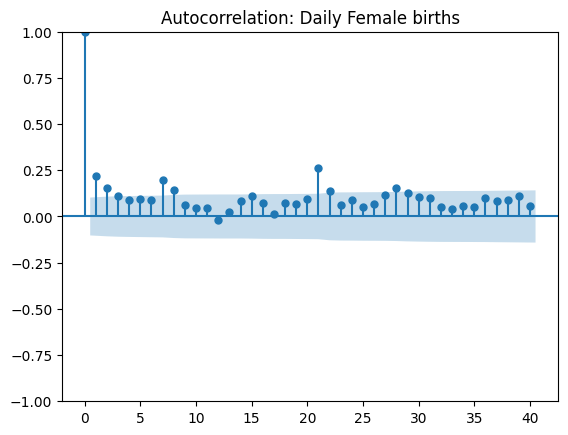

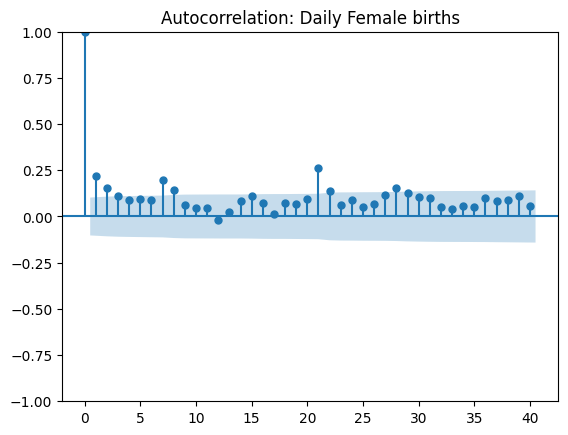

In [7]:
title = 'Autocorrelation: Daily Female births'
lags = 40
plot_acf(df2, title=title, lags=lags)

Este é um gráfico ACF típico para dados estacionários, com defasagens no eixo horizontal e correlações no eixo vertical. O primeiro valor $y_0$ é sempre 1. Uma queda acentuada indica que não há correlação significativa nos dados. 

A seguir faremos o mesmo procedimento com os dados não estacionários do dataset <strong>Airline Passengers</strong>.

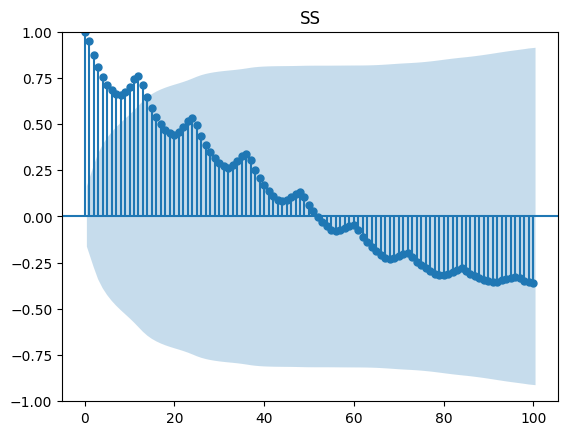

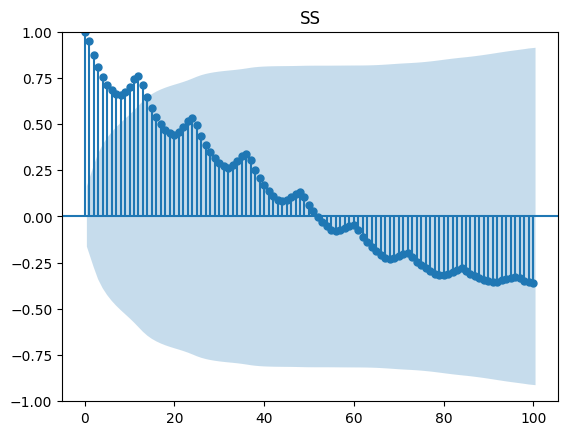

In [19]:
title = 'SS'
lags = 100
acf(df1['Thousands of Passengers'])
plot_acf(df1, title=title, lags=lags)

Este gráfico indica dados não estacionários, pois há um grande número de defasagens antes que os valores de ACF caiam significativamente.

### Autocorrelação Parcial (PACF)

<Axes: xlabel='Month'>

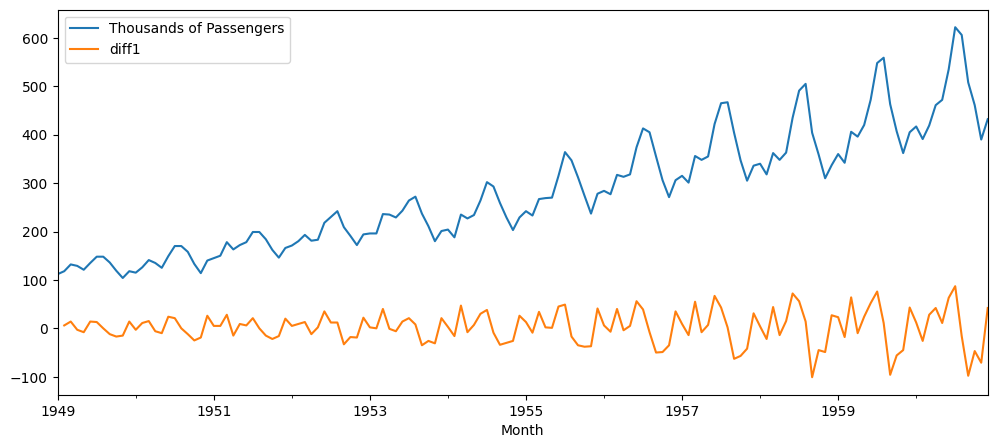

In [25]:

from statsmodels.tsa.statespace.tools import diff 

df1["diff1"] = diff(df1['Thousands of Passengers'] , k_diff =1)
df1.plot(figsize=(12,5))

Para obtermos a auto-correlação parcial com os dados de Airline Passengers, precisamos primeiro tornar esses dados estacionários, o que é feito aplicando diferenciação (differencing).

Agora podemos plotar a Autocorrelação parcial.

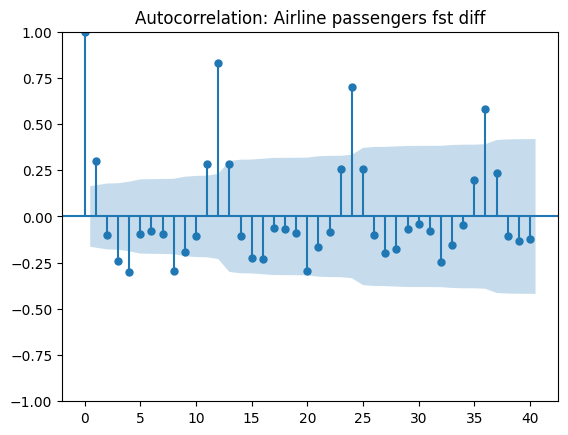

In [28]:
title = 'Autocorrelation: Airline passengers fst diff'
lags = 40
plot_acf(df1["diff1"].dropna(), title=title, lags=lags);